# Projeto Petrobras

In [392]:
%matplotlib inline
import subprocess
from wordcloud import WordCloud
import unicodedata
import re

In [393]:
#read capa
#TODO - checar se todo documento tem so uma pagina de capa mesmo (talvez seja mais seguro tirar do texto completo)
capa = rem_accents(subprocess.check_output("pdftotext -l 1 '01.09-2015-  Odebrecht.pdf' -", shell=True))
    
#read rest
text = rem_accents(subprocess.check_output("pdftotext -f 2 '01.09-2015-  Odebrecht.pdf' -", shell=True))

def rem_accents(text):
    if type(text) == str:
        text = unicode(text, 'utf8')
    return unicodedata.normalize('NFD', text).encode('ascii', 'ignore') #remove accents

# Get PDF meta-info (from cover)

In [394]:
#data
get_data = r'DATA:\s+(\d\d\/\d\d\/\d\d\d\d)'
res = re.search(get_data, capa, re.M|re.I)
if res:
    date = res.group(1)
    print("date: {}".format(date))
else:
    print("date not found in file!")
    
#n_pages
get_n_pages = r'PAGINAS:\s+(\d+)'
res = re.search(get_n_pages, capa, re.M|re.I)
if res:
    n_pages = int(res.group(1))
    print("n_pages: {}".format(n_pages))
else:
    print("n_pages not found in file!")


#depoentes_names
#depoentes_roles
re_depoentes_block = r'^DEPOENTE/CONVIDADO - QUALIFICACAO\n((?:.*\n)+)^SUMARIO\s*$'
res = re.search(re_depoentes_block, capa, re.M|re.I)
assert res, ">>>>Big problem: Didn't find names of depoentes!!!"
if res:
    depoentes_block = res.group(1)
    depoentes_names = []
    depoentes_cargos = []
    for l in re.split(r'\.\n', depoentes_block):
        l = l.replace('\n', ' ')
        parts = l.split(" - ")
        if len(parts) >= 2:
            nome = parts[0].strip()
            cargo = "".join(parts[1:]).strip()
            depoentes_names.append(nome)
            depoentes_cargos.append(cargo)
    for el in zip(depoentes_names, depoentes_cargos):
        print(el)

date: 01/09/2015
n_pages: 77
('CESAR RAMOS ROCHA', 'EX-DIRETOR DA ODEBRECHT')
('ANTONIO NABOR AREIAS BULHOES', 'ADVOGADO')
('ROGERIO SANTOS DE ARAUJO', 'EXECUTIVO DA ODEBRECHT')
('FLAVIA RAHAL BRESSER PEREIRA', 'ADVOGADA')
('MARCIO FARIA DA SILVA', 'DIRETOR DA ODEBRECHT')
('ALEXANDRINO DE SALLES RAMOS DE ALENCAR', 'EX-DIRETOR DA ODEBRECHT')
('MARCELO BAHIA ODEBRECHT', 'PRESIDENTE DA ODEBRECHT')
('CELSO ARARIPE DOLIVEIRA', 'EX-GERENTE DE EMPREENDIMENTOS DA PETROBRAS NO ESPIRITO SANTO')


# Treat the rest of the text

### Clean text

In [395]:
#limpa texto
clean_header = r'CAMARA DOS DEPUTADOS - DETAQ(?:.*\n)*?\d\d\/\d\d\/\d\d\d\d'
clean_num = r'\n\s*\d+\s*\n'
clean_mult_n = r'\n\n+'


#remove headers
text, subs = re.subn(clean_header, "", text, flags=re.M)
print(subs)
assert subs == n_pages, "doing more substitutions than pages!"
    

#remove page numbers
text, subs = re.subn(clean_num, "\n", text, flags=re.M)
print(subs)
assert subs == n_pages, "doing more substitutions than pages!"

#remove double newlines
text, subs = re.subn(clean_mult_n, "", text, flags=re.M)
print(subs)

77
77
27


### Get people phrases

In [396]:
#regex_str = r'(^.+CESAR RAMOS ROCHA.*\n(:?^.*\n)*?)O SR'
for depoente in depoentes_names:
    regex_str = r'(^.+{}.*\n(?:.*\n)*?)(?:O\s+SR|A\s+SRA)'.format(depoente)
    frases_regex = re.compile(regex_str, re.M)
    frases = frases_regex.findall(text)
    for f in frases:
        print(f)


#p = re.compile(r'^\s*6\s*$')#, "", frases[11][0], re.M))


# for depoente in nomes:
#     print
#     print(depoente)
#     #regex_str = r'(^.+{} - .*\n+^)[O SR\.|A SRA\.].*$'.format(depoente)
#     regex_str = r'(^.+{} - .*)^O SR'.format(depoente)
#     frases_regex = re.compile(regex_str, re.M|re.DOTALL)
#     frases = frases_regex.findall(text)
    
#     for f in frases:
#         print(f[0])
#         #print(f.strip())


# >>> p = re.compile('\d+')
# >>> p.findall('12 drummers drumming, 11 pipers piping, 10 lords a-leaping')
# ['12', '11', '10']


# #frases_regex = re.search(r'(^.*CESAR RAMOS ROCHA - [.*\n]+)^[O SR\.]|[A SRA\.].*$', text, re.MULTILINE|re.I)
# frases_regex = re.findall(r'(^.*CESAR RAMOS ROCHA - .*)', text, re.MULTILINE|re.I)
# if frases_regex:
#     print(frases_regex.group())

O SR. CESAR RAMOS ROCHA - Bom dia! Nos termos assegurados pelo
Supremo, eu vou exercer o direito de permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Como eu disse, Excelencia, vou
permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Eu vou permanecer em silencio.

O SR. CESAR RAMOS ROCHA - Permanecerei em silencio.

O SR. CESAR RAMOS ROCHA - Permanecerei em silencio.

O SR. CESAR RAMOS ROCHA - Permanecei em silencio.

O SR. CESAR RAMOS ROCHA - Permanecerei em silencio.

O SR. CESAR RAMOS ROCHA - Permanecerei em silencio.

O SR. CESAR RAMOS ROCHA - Permanecerei em silencio.

O SR. CESAR R

In [397]:
#utf8_text = convert_pdf_to_txt('01.09-2015-  Odebrecht.pdf')

text2 = unicode(utf8_text, 'utf8')
text = unicodedata.normalize('NFD', text2).encode('ascii', 'ignore')
print(text)


CAMARA DOS DEPUTADOS 

 
 
 
 

DEPARTAMENTO DE TAQUIGRAFIA, REVISAO E REDACAO 

NUCLEO DE REDACAO FINAL EM COMISSOES 

 

 

TEXTO COM REDACAO FINAL 

 

Versao para registro historico 

 

Nao passivel de alteracao 

 
 
 

CPI - PETROBRAS 

REUNIAO N: 1630/15 

DATA: 01/09/2015 

INICIO: 09h49min 

TERMINO: 12h54min 

PAGINAS: 77 

EVENTO: Audiencia Publica 
LOCAL: Foro da 
Secao Judiciaria do 
Parana 

DEPOENTE/CONVIDADO - QUALIFICACAO 

 

 

CESAR RAMOS ROCHA - EX-DIRETOR DA ODEBRECHT. 

ANTONIO NABOR AREIAS BULHOES - ADVOGADO. 

ROGERIO SANTOS DE ARAUJO - EXECUTIVO DA ODEBRECHT. 

FLAVIA RAHAL BRESSER PEREIRA - ADVOGADA. 

MARCIO FARIA DA SILVA - DIRETOR DA ODEBRECHT. 

ALEXANDRINO DE SALLES RAMOS DE ALENCAR - EX-DIRETOR DA ODEBRECHT. 

MARCELO BAHIA ODEBRECHT - PRESIDENTE DA ODEBRECHT. 

CELSO ARARIPE DOLIVEIRA - EX-GERENTE DE EMPREENDIMENTOS DA PETROBRAS NO 

ESPIRITO SANTO. 

 

 

Tomada de depoimento. 

 

 

SUMARIO 

OBSERVACOES 

Houve intervencoes fora do microfone. Ina

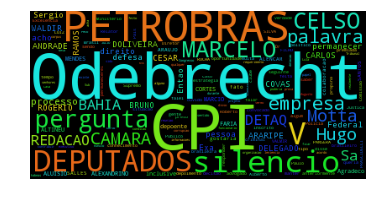

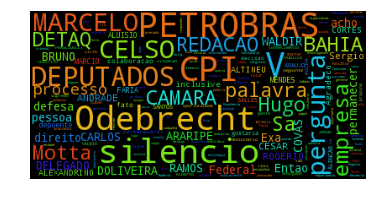

In [171]:


# Generate a word cloud image
STOPWORDS = set([rem_accents(x.strip()) for x in open('stopwords-pt.txt').read().split('\n')]) | \
            {"sr", "senhor", "deputado", "presidente", "vou", }

wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

#take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, stopwords=STOPWORDS).generate(text)#, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()

In [5]:
#see https://github.com/euske/pdfminer/blob/14fd0fd2d6ef4e709731377decc6a8c119e5e9d6/tools/pdf2txt.py for changes
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO


def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = file(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text